<a href="https://colab.research.google.com/github/alexxega/git-demo/blob/main/Copy_of_Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  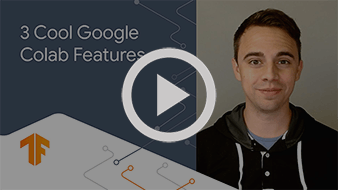
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or ‘Colaboratory’, allows you to write and execute Python in your browser, with 
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a <strong>student</strong>, a <strong>data scientist</strong> or an <strong>AI researcher</strong>, Colab can make your work easier. Watch <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introduction to Colab</a> to find out more, or just get started below!

<div class="markdown-google-sans">

## <strong>Getting started</strong>
</div>

The document that you are reading is not a static web page, but an interactive environment called a <strong>Colab notebook</strong> that lets you write and execute code.

For example, here is a <strong>code cell</strong> with a short Python script that computes a value, stores it in a variable and prints the result:

In [1]:
pip install scalecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.7/873.7 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 77.4 MB/s eta 0:00:00
  Created wheel for scalecast: filename=SCALECAST-0.18.5-py3-none-any.whl size=111271 sha256=5964d83a56b9a58f4816753d9ee90d6e49c8916f1e9a13e9752b75ea3e522c50
  Stored in directory: /root/.cache/pip/wheels/30/32/ba/76f7451f377557131b3736c35cd6ab417576434d865d548f24
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=1

In [2]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns

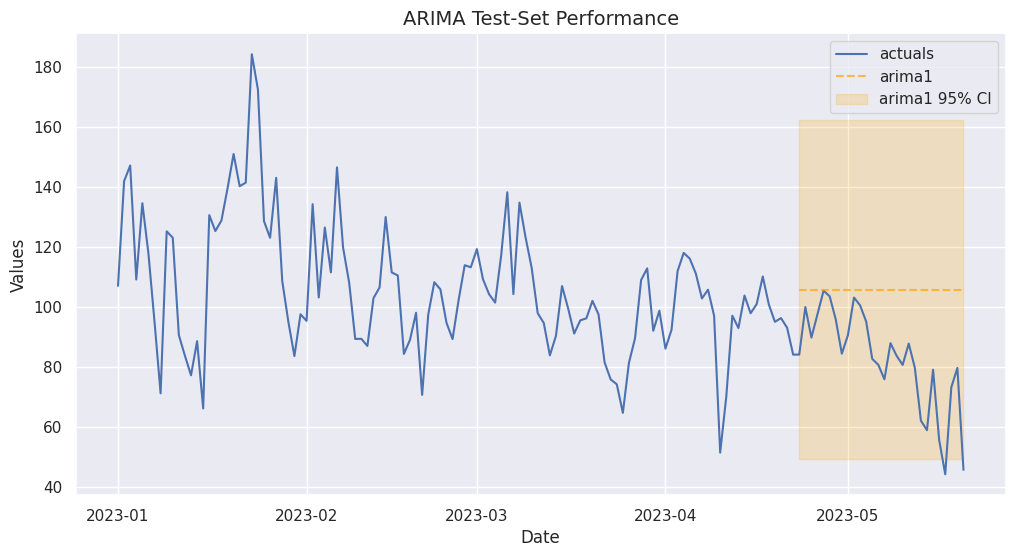

In [3]:
sns.set(rc={'figure.figsize':(14,7)})
path = "/content/AirPassengers.csv"
df = pd.read_csv(path)
f = Forecaster(
    y=df['#Price'],
    current_dates=df['Day'],
    future_dates = 12,
    test_length = .2,
    cis = True,
)
f
f.set_estimator('arima')
f.manual_forecast(call_me='arima1')
f.plot_test_set(ci=True)
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

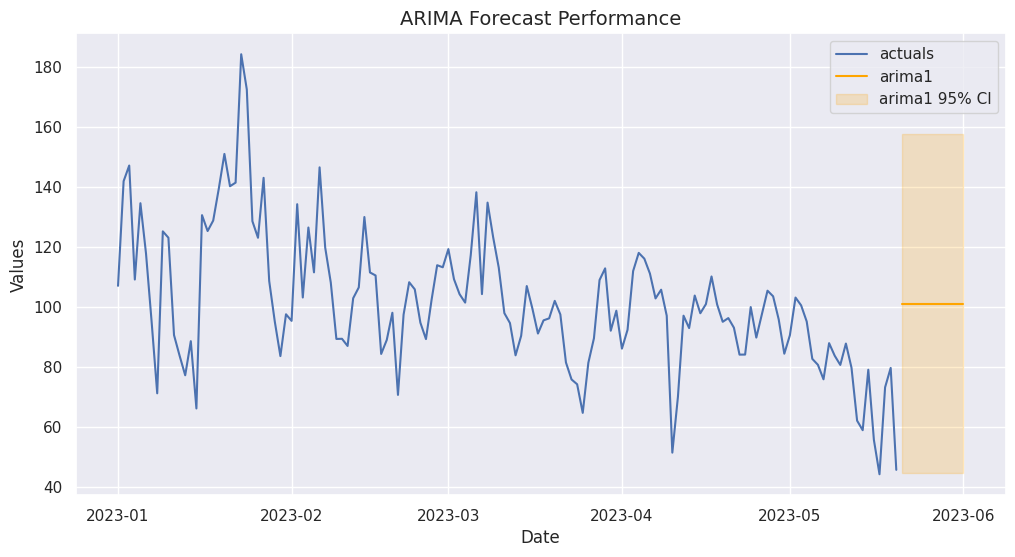

In [4]:
f.plot(ci=True)
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


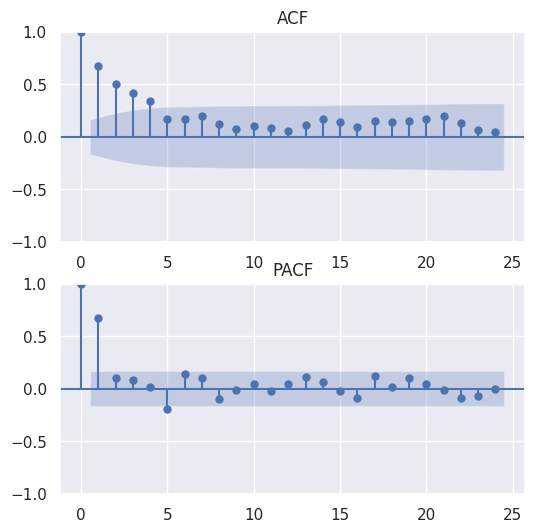

In [5]:
figs, axs = plt.subplots(2, 1,figsize=(6,6))
f.plot_acf(ax=axs[0],title='ACF',lags=24)
f.plot_pacf(ax=axs[1],title='PACF',lags=24)
plt.show()

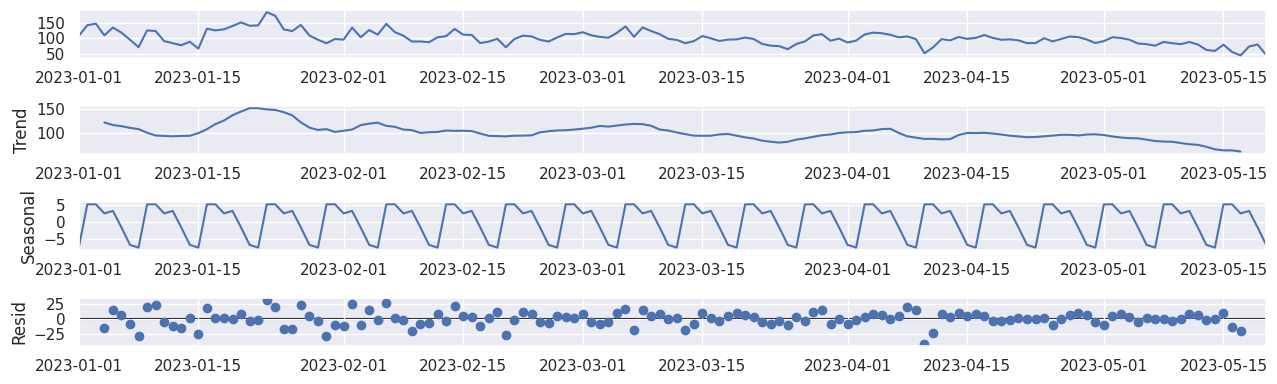

In [6]:
plt.rc("figure",figsize=(13,4))
f.seasonal_decompose().plot()
plt.show()

In [7]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

-4.6887948005708635
8.832745771629404e-05


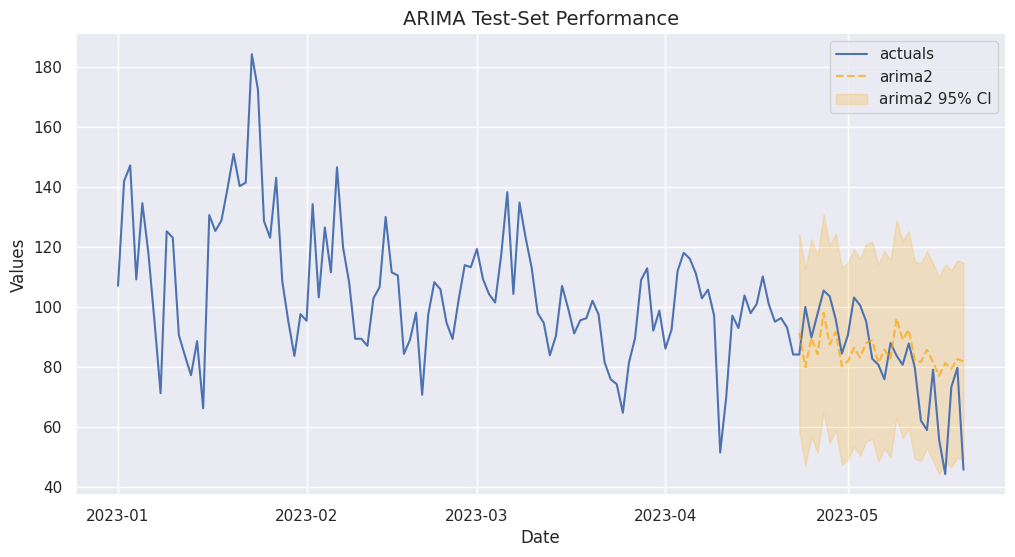

Axes(0.125,0.11;0.775x0.77)


In [81]:
f.manual_forecast(order=(1,1,1),seasonal_order=(2,1,1,12),call_me='arima2')
test_set = f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

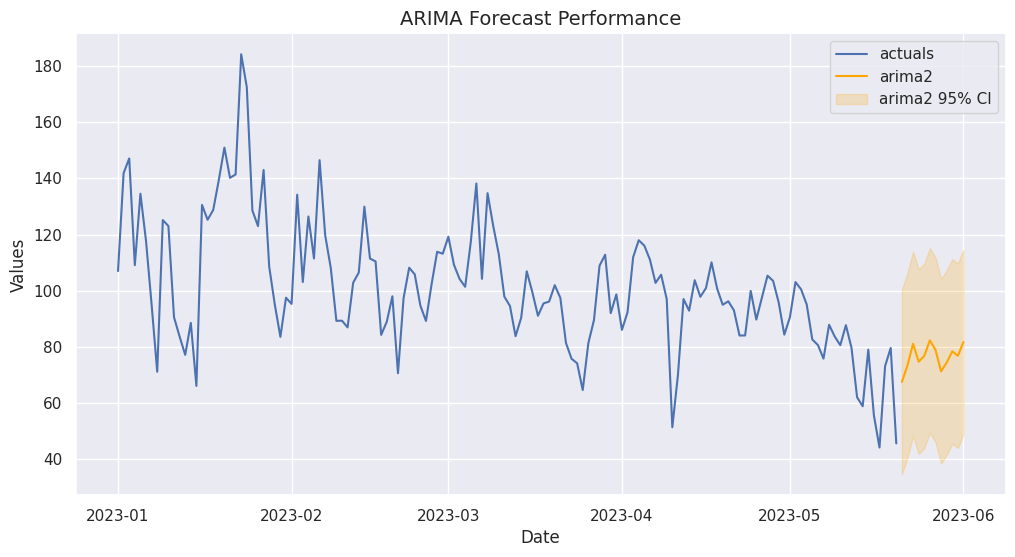

In [9]:
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [10]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  140
Model:             ARIMA(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -548.322
Date:                          Thu, 01 Jun 2023   AIC                           1108.644
Time:                                  06:23:23   BIC                           1125.709
Sample:                                       0   HQIC                          1115.577
                                          - 140                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5753      0.081      7.073      0.000       0.416       0.735
ma.L1         -0.9998     14.584     -0.069      0.945     -29.583      27.583
ar.S.L12      -0.2746      0.152     -1.811      0.070      -0.572       0.023
ar.S.L24      -0.1733      0.141     -1.226      0.220      -0.450       0.104
ma.S.L12      -0.7699      0.201     -3.829      0.000      -1.164      -0.376
sigma2       270.6569   3941.573      0.069      0.945   -7454.683    7995.997
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                15.28
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             0.47
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Performing stepwise search to minimize aic
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=4.38 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1200.327, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1193.345, Time=0.94 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1188.586, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1198.411, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1189.605, Time=0.44 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1190.535, Time=1.81 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1190.485, Time=3.08 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1188.864, Time=0.83 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=5.79 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1199.624, Time=0.52 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=2.48 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=1185.746, Time=1.72 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1186.311, Time=0.54 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept

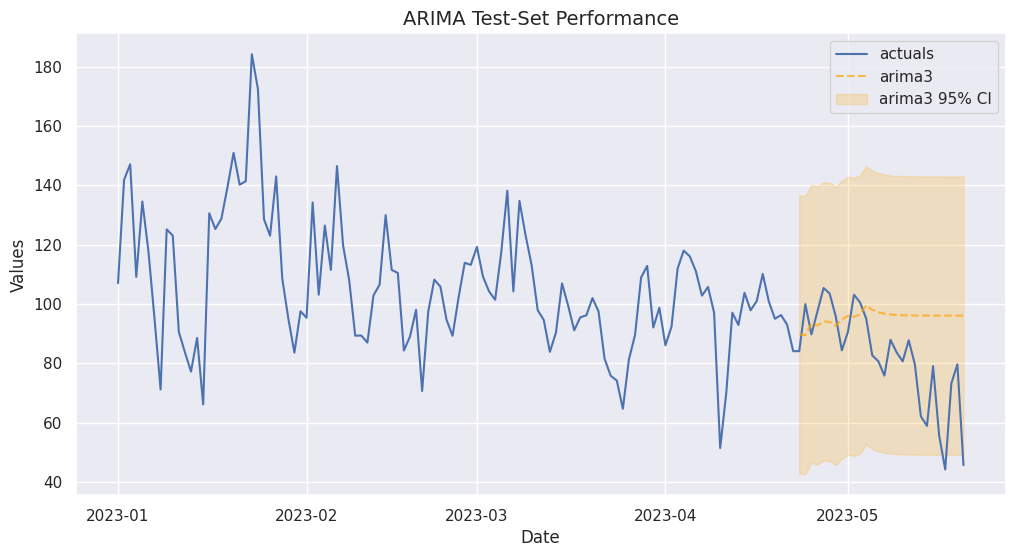

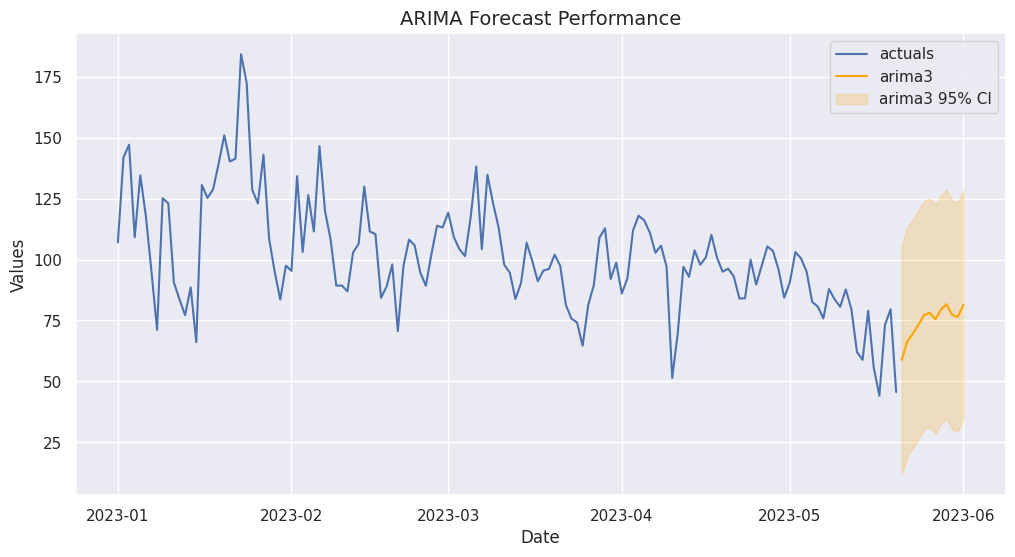

In [13]:
from scalecast.auxmodels import auto_arima
auto_arima(
    f,
    start_P=1,
    start_q=1,
    max_p=6,
    max_q=6,
    m=12,
    seasonal=True,
    max_P=2, 
    max_D=2,
    max_Q=2,
    max_d=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    information_criterion="aic",
    alpha=0.05,
    scoring='mse',
    call_me='arima3',
)

f.plot_test_set(ci=True,models='arima3')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True,models='arima3')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()


In [14]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  140
Model:             ARIMA(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -585.151
Date:                          Thu, 01 Jun 2023   AIC                           1178.302
Time:                                  06:26:03   BIC                           1190.040
Sample:                                       0   HQIC                          1183.072
                                          - 140                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5616      0.098      5.717      0.000       0.369       0.754
ma.L1         -0.9275      0.060    -15.396      0.000      -1.046      -0.809
ma.S.L12      -0.1537      0.085     -1.798      0.072      -0.321       0.014
sigma2       263.0299     31.693      8.299      0.000     200.912     325.148
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 3.37
Prob(Q):                              0.67   Prob(JB):                         0.19
Heteroskedasticity (H):               0.37   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

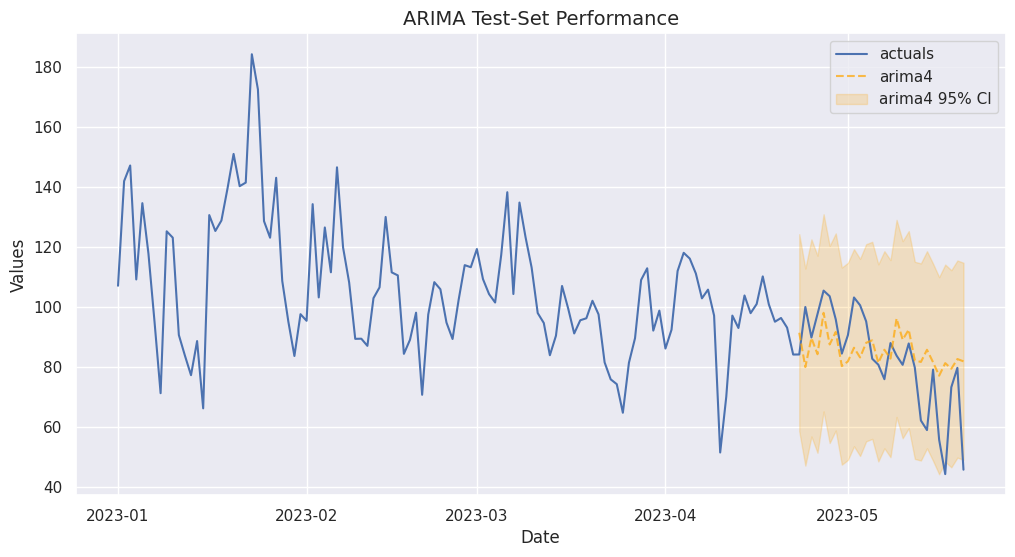

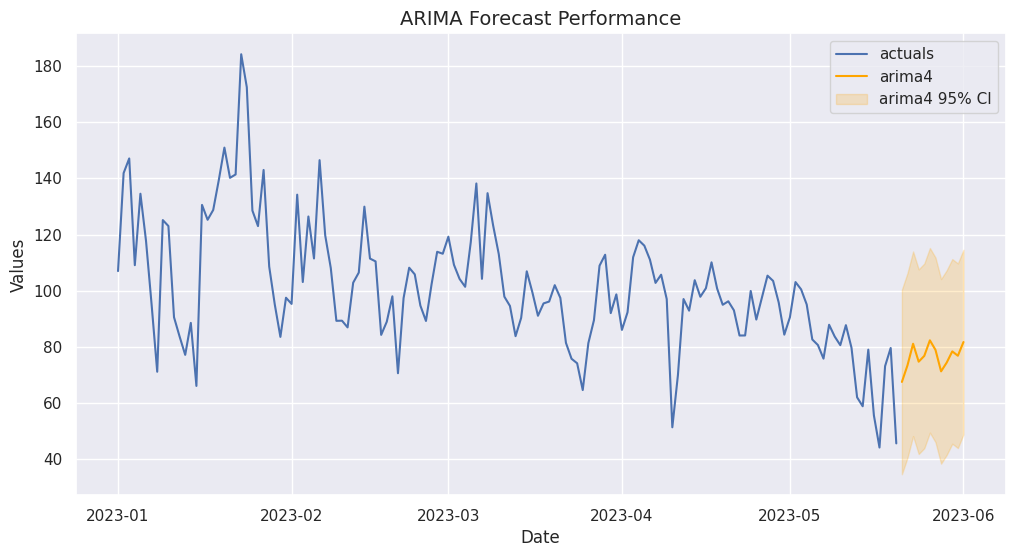

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  140
Model:             ARIMA(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -548.322
Date:                          Wed, 31 May 2023   AIC                           1108.644
Time:                                  07:03:21   BIC                           1125.709
Sample:                                       0   HQIC                          1115.577
                                          - 140                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5753      0.081      7.073      0.000       0.416       0.735
ma.L1         -0.9998     14.584     -0.069      0.945     -29.583      27.583
ar.S.L12      -0.2746      0.152     -1.811      0.070      -0.572       0.023
ar.S.L24      -0.1733      0.141     -1.226      0.220      -0.450       0.104
ma.S.L12      -0.7699      0.201     -3.829      0.000      -1.164      -0.376
sigma2       270.6569   3941.573      0.069      0.945   -7454.683    7995.997
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                15.28
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             0.47
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
f.set_validation_length(12)
grid = {
    'order':[(1,1,1),(1,1,0),(0,1,1)],
    'seasonal_order':[(2,1,1,12),(1,1,1,12),(2,1,0,12),(0,1,0,12)]
}

f.ingest_grid(grid)
f.tune()
f.auto_forecast(call_me='arima4')

f.plot_test_set(ci=True,models='arima4')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True,models='arima4')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

f.regr.summary()

In [ ]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  140
Model:             ARIMA(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -548.322
Date:                          Wed, 31 May 2023   AIC                           1108.644
Time:                                  07:03:45   BIC                           1125.709
Sample:                                       0   HQIC                          1115.577
                                          - 140                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5753      0.081      7.073      0.000       0.416       0.735
ma.L1         -0.9998     14.584     -0.069      0.945     -29.583      27.583
ar.S.L12      -0.2746      0.152     -1.811      0.070      -0.572       0.023
ar.S.L24      -0.1733      0.141     -1.226      0.220      -0.450       0.104
ma.S.L12      -0.7699      0.201     -3.829      0.000      -1.164      -0.376
sigma2       270.6569   3941.573      0.069      0.945   -7454.683    7995.997
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                15.28
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             0.47
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pd.options.display.max_colwidth = 100
results = f.export(to_excel=True,excel_name='arima_results.xlsx',determine_best_by='TestSetMAPE')
summaries = results['model_summaries']
summaries[['ModelNickname','HyperParams','InSampleMAPE','TestSetMAPE']]

,ModelNickname,HyperParams,InSampleMAPE,TestSetMAPE
0,arima4,"{'order': (1, 1, 1), 'seasonal_order': (2, 1, 1, 12)}",0.165032,0.171106
1,arima2,"{'order': (1, 1, 1), 'seasonal_order': (2, 1, 1, 12)}",0.165032,0.171106
2,arima3,"{'order': (1, 1, 1), 'seasonal_order': (0, 0, 1, 12), 'trend': None}",0.143109,0.255709
3,arima1,{},0.184560,0.350959


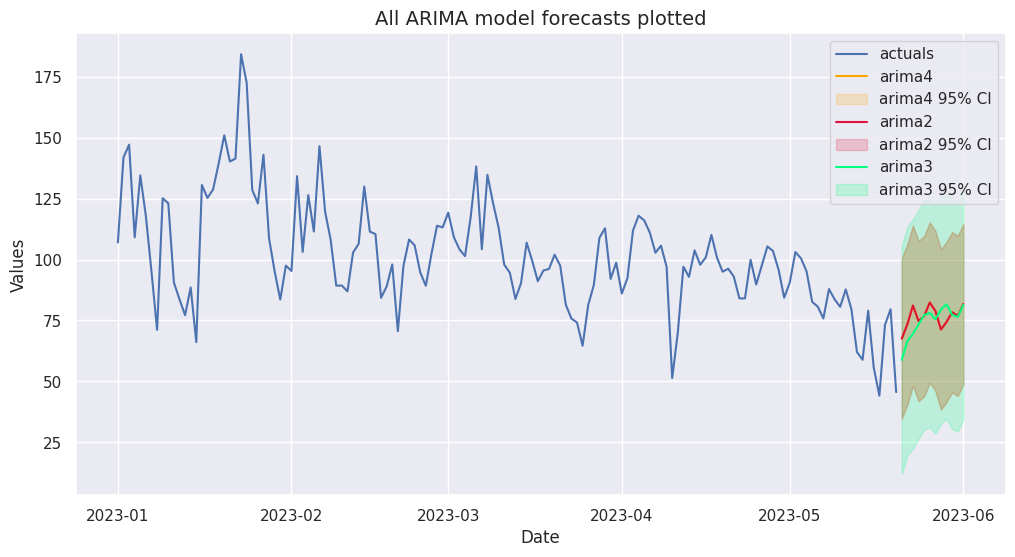

In [ ]:
f.plot(ci=True,models=['arima2','arima3','arima4'],order_by='TestSetMAPE')
plt.title('All ARIMA model forecasts plotted',size=14)
plt.show()

In [ ]:
print(plt.show)

<function show at 0x7fe9c0b6a290>


In [24]:
n=len(df)
n

140

In [25]:
start_index = n-20
start_index

120

In [88]:
df_training = df.iloc[:start_index]
df_test = df.iloc[start_index:]
df_training.tail()

,Day,#Price
Date,,
2023-04-26,26-Apr-23,97.55
2023-04-27,27-Apr-23,105.36
2023-04-28,28-Apr-23,103.49
2023-04-29,29-Apr-23,95.79
2023-04-30,30-Apr-23,84.36


In [26]:
df_training = df.iloc[:start_index]
df_test = df.iloc[start_index:]
df_training.tail()

,Day,#Price
Date,,
2023-04-26,26-Apr-23,97.55
2023-04-27,27-Apr-23,105.36
2023-04-28,28-Apr-23,103.49
2023-04-29,29-Apr-23,95.79
2023-04-30,30-Apr-23,84.36


In [22]:
df["Date"] = pd.to_datetime(df["Day"])
df.head()

,Day,#Price,Date
Date,,,
2023-01-01,1-Jan-23,106.98,2023-01-01
2023-01-02,2-Jan-23,141.86,2023-01-02
2023-01-03,3-Jan-23,147.07,2023-01-03
2023-01-04,4-Jan-23,109.08,2023-01-04
2023-01-05,5-Jan-23,134.51,2023-01-05


In [23]:
df.set_index("Date", inplace=True)
df.head()

,Day,#Price
Date,,
2023-01-01,1-Jan-23,106.98
2023-01-02,2-Jan-23,141.86
2023-01-03,3-Jan-23,147.07
2023-01-04,4-Jan-23,109.08
2023-01-05,5-Jan-23,134.51


In [20]:
df.index.freq="D"

In [21]:
start_index

120

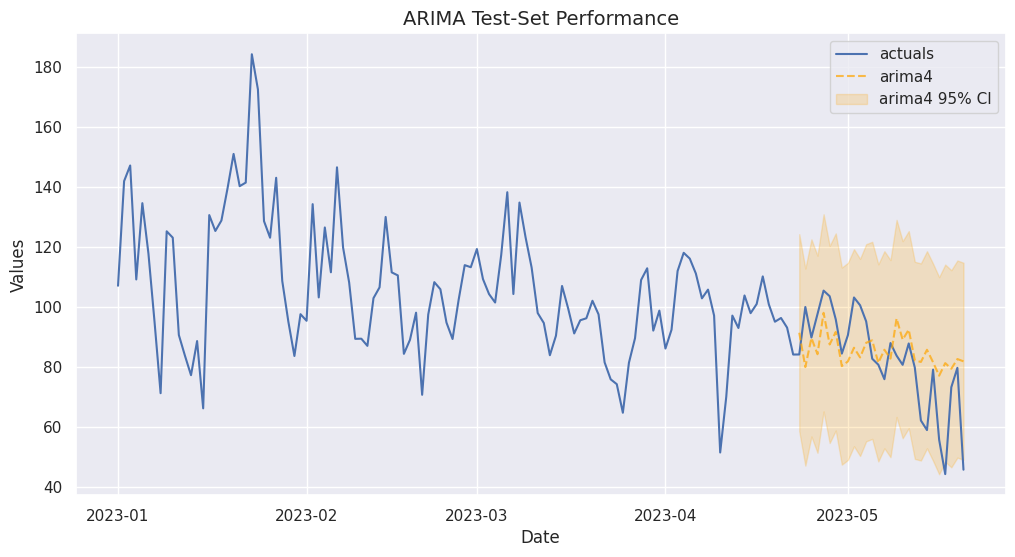

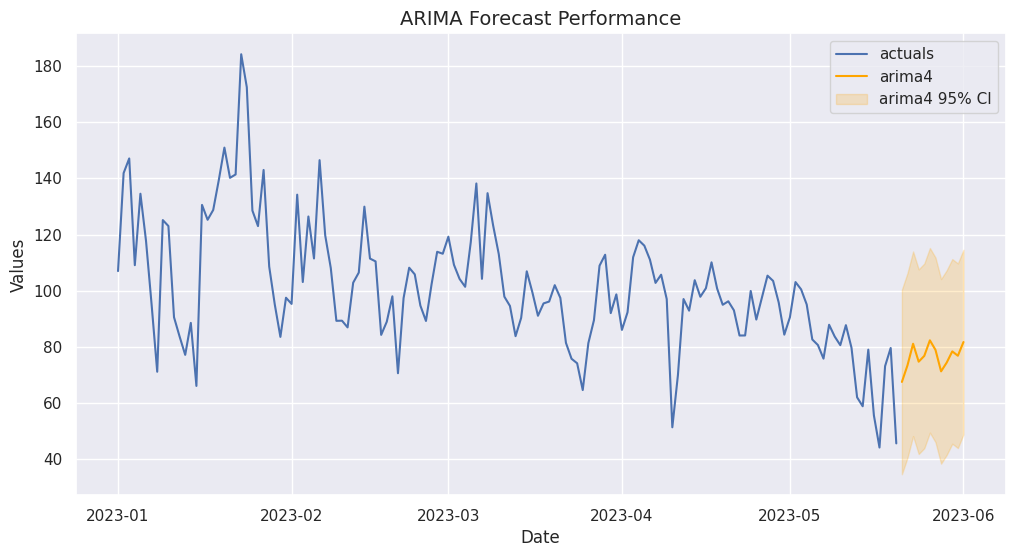

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  140
Model:             ARIMA(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -548.322
Date:                          Thu, 01 Jun 2023   AIC                           1108.644
Time:                                  06:43:28   BIC                           1125.709
Sample:                                       0   HQIC                          1115.577
                                          - 140                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5753      0.081      7.073      0.000       0.416       0.735
ma.L1         -0.9998     14.584     -0.069      0.945     -29.583      27.583
ar.S.L12      -0.2746      0.152     -1.811      0.070      -0.572       0.023
ar.S.L24      -0.1733      0.141     -1.226      0.220      -0.450       0.104
ma.S.L12      -0.7699      0.201     -3.829      0.000      -1.164      -0.376
sigma2       270.6569   3941.573      0.069      0.945   -7454.683    7995.997
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                15.28
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             0.47
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
results = f.set_validation_length(12)
grid = {
    'order':[(1,1,1),(1,1,0),(0,1,1)],
    'seasonal_order':[(2,1,1,12),(1,1,1,12),(2,1,0,12),(0,1,0,12)]
}

f.ingest_grid(grid)
f.tune()
f.auto_forecast(call_me='arima4')

f.plot_test_set(ci=True,models='arima4')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True,models='arima4')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

f.regr.summary()

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [60]:
model = SARIMAX(df_training['#Price'],order=(1,1,1),seasonal_order=(2,1,1,12))
results = model.fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             #Price   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -466.911
Date:                            Thu, 01 Jun 2023   AIC                            945.822
Time:                                    07:01:15   BIC                            961.859
Sample:                                01-01-2023   HQIC                           952.323
                                     - 04-30-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5637      0.099      5.710      0.000       0.370       0.757
ma.L1         -0.9928      0.774     -1.283      0.199      -2.509       0.523
ar.S.L12      -0.1890      0.203     -0.932      0.352      -0.587       0.209
ar.S.L24      -0.1173      0.179     -0.657      0.511      -0.467       0.233
ma.S.L12      -0.9575      1.421     -0.674      0.501      -3.743       1.828
sigma2       260.6112    337.718      0.772      0.440    -401.304     922.527
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                12.39
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
start=len(df_training)
end=len(df_training)+len(df_test)-1
predictions = results.predict(start=start, end=end, dynamic=False, type='level')

In [62]:
predictions

2023-05-01    84.668921
2023-05-02    89.050298
2023-05-03    85.474338
2023-05-04    87.488938
2023-05-05    89.912928
2023-05-06    81.808384
2023-05-07    87.280985
2023-05-08    83.815313
2023-05-09    96.806927
2023-05-10    89.569882
2023-05-11    93.995403
2023-05-12    83.864810
2023-05-13    83.100784
2023-05-14    87.293404
2023-05-15    83.264149
2023-05-16    78.970470
2023-05-17    83.155251
2023-05-18    80.910365
2023-05-19    84.147217
2023-05-20    83.175009
Freq: D, Name: predicted_mean, dtype: float64

In [63]:
for i in range(len(predictions)):
  print(f"predicted=={predictions[i]:<05.19}, expected={df_test['#Price'][i]}")

predicted==84.66892130058224097, expected=90.53
predicted==89.05029792352551965, expected=103.07
predicted==85.47433836749188174, expected=100.48
predicted==87.48893790749215782, expected=95.1
predicted==89.91292816237759666, expected=82.64
predicted==81.80838369117387288, expected=80.66
predicted==87.28098529561043506, expected=75.83
predicted==83.81531349346826687, expected=87.88
predicted==96.80692680101402914, expected=83.69
predicted==89.56988228250047257, expected=80.62
predicted==93.99540322308175178, expected=87.74
predicted==83.86481005332380789, expected=79.69
predicted==83.10078419467096467, expected=62.06
predicted==87.29340379478044554, expected=58.87
predicted==83.26414929981844182, expected=79.02
predicted==78.97047029053192091, expected=55.64
predicted==83.15525140383952873, expected=44.19
predicted==80.91036508946463357, expected=73.16
predicted==84.14721690513420072, expected=79.62
predicted==83.17500941804991044, expected=45.66


[Text(0.5, 0, ''), Text(0, 0.5, 'Euro/MWh')]

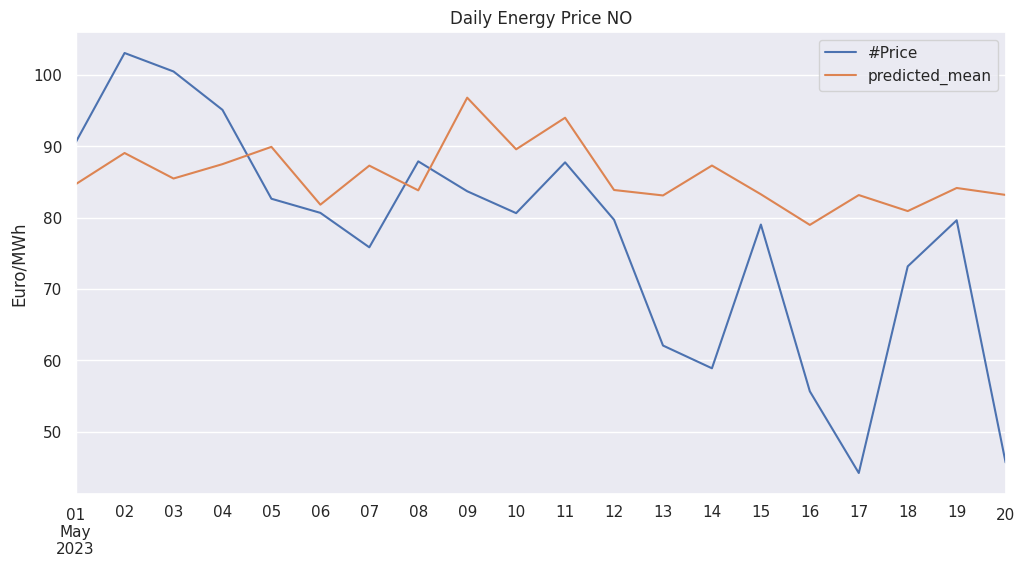

In [84]:
title = "Daily Energy Price NO"
ylabel = 'Euro/MWh'
xlabel = ''
ax = df_test['#Price'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

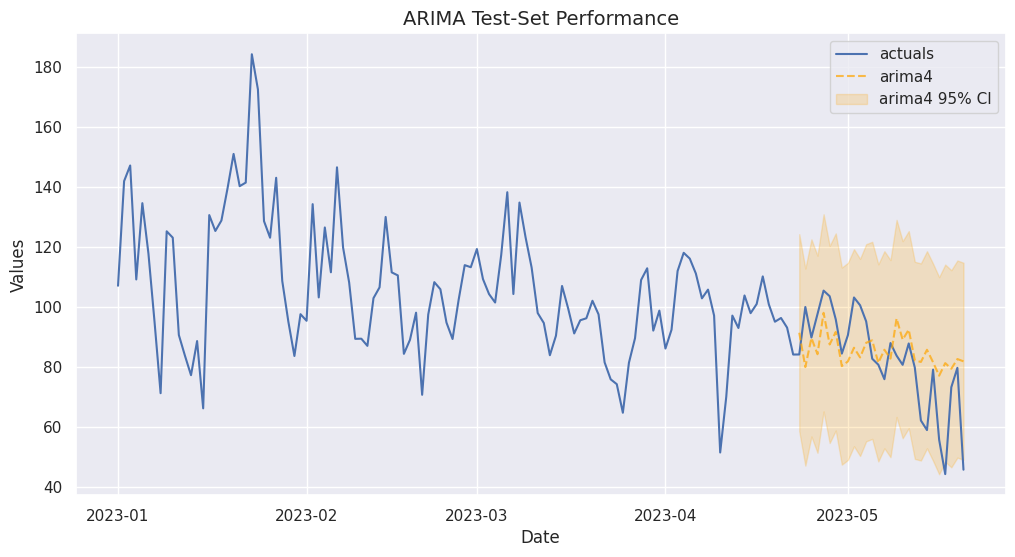

In [69]:
f.set_validation_length(12)
grid = {
    'order':[(1,1,1),(1,1,0),(0,1,1)],
    'seasonal_order':[(2,1,1,12),(1,1,1,12),(2,1,0,12),(0,1,0,12)]
}

f.ingest_grid(grid)
f.tune()
f.auto_forecast(call_me='arima4')

f.plot_test_set(ci=True,models='arima4')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

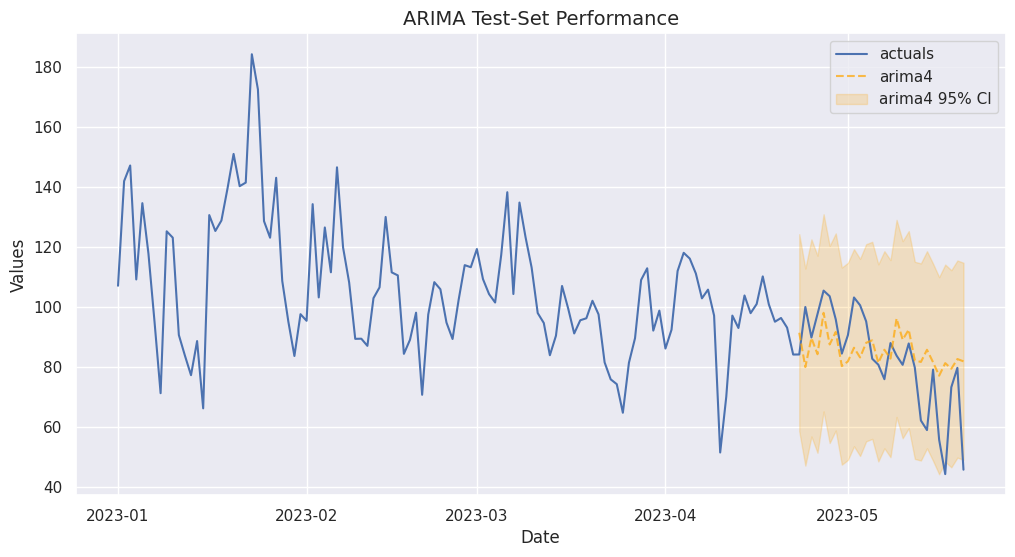

In [72]:
f.set_validation_length(12)
grid = {
    'order':[(1,1,1),(1,1,0),(0,1,1)],
    'seasonal_order':[(2,1,1,12),(1,1,1,12),(2,1,0,12),(0,1,0,12)]
}

f.plot_test_set(ci=True,models='arima4')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

In [78]:
# Generate the forecast
f.manual_forecast(order=(1, 1, 1), seasonal_order=(2, 1, 1, 12), call_me='arima2')

# Access the test set performance attributes
test_actuals = f.test_actuals  # Actual values of the test set
test_predictions = f.test_predictions_arima2  # Predicted values of the test set
test_residuals = f.test_residuals_arima2  # Residuals of the test set

# Print the values
print("Test Set Actuals:")
print(test_actuals)
print("\nTest Set Predictions:")
print(test_predictions)
print("\nTest Set Residuals:")
print(test_residuals)


AttributeError: ignored

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut 'Command/Ctrl+Enter'. To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine <strong>executable code</strong> and <strong>rich text</strong> in a single document, along with <strong>images</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To find out more, see <a href="/notebooks/basic_features_overview.ipynb">Overview of Colab</a>. To create a new Colab notebook you can use the File menu above, or use the following link: <a href="http://colab.research.google.com#create=true">Create a new Colab notebook</a>.

Colab notebooks are Jupyter notebooks that are hosted by Colab. To find out more about the Jupyter project, see <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyse and visualise data. The code cell below uses <strong>numpy</strong> to generate some random data, and uses <strong>matplotlib</strong> to visualise it. To edit the code, just click the cell and start editing.

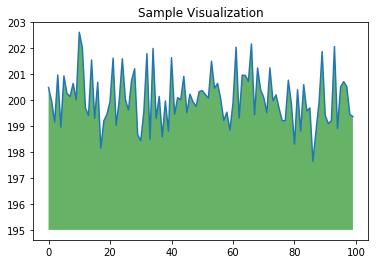

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from GitHub and many other sources. To find out more about importing data, and how Colab can be used for data science, see the links below under <a href="#working-with-data">Working with data</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">a few lines of code</a>. Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including <a href="#using-accelerated-hardware">GPUs and TPUs</a>, regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the <a href="#machine-learning-examples">machine learning examples</a> below.

<div class="markdown-google-sans">

## More resources

### Working with notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with data
</div>

- [Loading data: Drive, Sheets and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualising data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine learning crash course

<div>

These are a few of the notebooks from Google's online machine learning course. See the <a href="https://developers.google.com/machine-learning/crash-course/">full course website</a> for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using accelerated hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo voice swap</a>: Use Nvidia NeMo conversational AI toolkit to swap a voice in an audio fragment with a computer-generated one.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Retraining an Image Classifier</a>: Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Text Classification</a>: Classify IMDB film reviews as either <em>positive</em> or <em>negative</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Style Transfer</a>: Use deep learning to transfer style between images.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: Use a machine-learning model to answer questions from the SQuAD dataset.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video Interpolation</a>: Predict what happened in a video between the first and the last frame.
